### Load Probabilities

In [9]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

class_names = ['Bacteria Pneumonia', 'Corona Virus Disease', 'Normal', 'Tuberculosis', 'Viral Pneumonia']  # Replace with actual class names

# Load true labels
true_labels = np.load('true_labels.npy')

# Load saved probabilities
CNN_probs = np.load("probs_CNN.npy")  # Shape: [num_samples, num_classes]
ResNet_probs = np.load("probs_ResNet.npy")
Efficient_probs = np.load("probs_EfficientNet.npy")

# Combine probabilities
all_probabilities = np.array([CNN_probs, ResNet_probs, Efficient_probs])  # Shape: [num_models, num_samples, num_classes]


### Soft Voting

Soft Voting Accuracy: 0.9101
Classification Report (Soft Voting):
              precision    recall  f1-score   support

           0     0.8337    0.8337    0.8337       403
           1     0.9975    0.9828    0.9901       407
           2     0.8964    0.9851    0.9387       404
           3     0.9927    0.9975    0.9951       408
           4     0.8229    0.7494    0.7844       403

    accuracy                         0.9101      2025
   macro avg     0.9086    0.9097    0.9084      2025
weighted avg     0.9090    0.9101    0.9088      2025



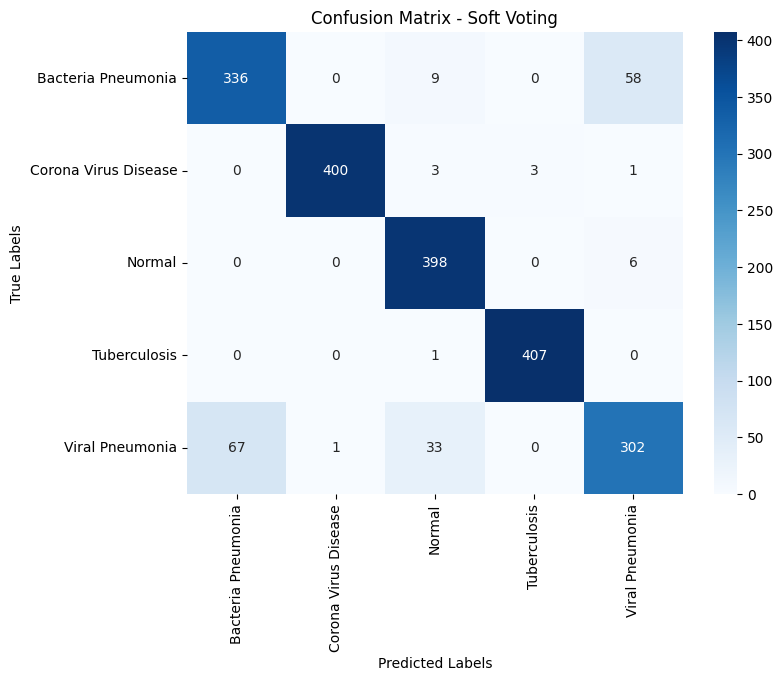

In [10]:
from sklearn.metrics import accuracy_score, classification_report

# Average probabilities across models
average_probabilities = np.mean(all_probabilities, axis=0)  # Shape: [num_samples, num_classes]

# Final predictions
final_predictions = np.argmax(average_probabilities, axis=1)  # Select class with the highest average probability

# Evaluate predictions
accuracy = accuracy_score(true_labels, final_predictions)
print(f"Soft Voting Accuracy: {accuracy:.4f}")  # Display with 4 decimal places

# Additional metrics (Precision, Recall, F1-Score)
report = classification_report(true_labels, final_predictions, digits=4)  # digits=4 ensures 4 decimals in the report

# Display formatted report
print("Classification Report (Soft Voting):")
print(report)

# Confusion Matrix
cm = confusion_matrix(true_labels, final_predictions)

# Plotting the Confusion Matrix with Class Names
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix - Soft Voting")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()